<a href="https://colab.research.google.com/github/gavincapriola/PyTorch-Deep-Learning-and-Artificial-Intelligence/blob/main/Natural%20Language%20Processing%20(NLP)/Custom_PyTorch_Text_Classification_RNN_with_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchtext==0.6.0
!pip install spacy==2.2.3
!python -m spacy download en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
     |████████████████████████████████| 1.3 MB 18.3 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 6.3 MB/s 
     |████████████████████████████████| 208 kB 23.8 MB/s 
     |████████████████████████████████| 2.2 MB 53.3 MB/s 
     |████████████████████████████████| 3.7 MB 42.6 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.8
    Uninstalling blis-0.7.8:
      Successfully uninstalled blis-0.7

In [2]:
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2022-10-18 22:40:06--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2022-10-18 22:40:06 (18.9 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [8]:
df2 = df[['data', 'b_labels']]
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df2.to_csv('spam2.csv', index=False)

In [10]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=True,
    tokenize="spacy",
    pad_first=True)
LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

dataset = ttd.TabularDataset(
    path="spam2.csv",
    format="csv",
    fields=[("data", TEXT), ("label", LABEL)],
    skip_header=True)

In [11]:
train_dataset, test_dataset = dataset.split()
TEXT.build_vocab(train_dataset)

In [12]:
vocab = TEXT.vocab

In [13]:
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f3d05018790>>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'i': 3,
             'to': 4,
             'you': 5,
             ',': 6,
             '?': 7,
             'a': 8,
             'the': 9,
             '!': 10,
             'u': 11,
             '...': 12,
             'and': 13,
             'is': 14,
             'in': 15,
             'me': 16,
             'my': 17,
             'it': 18,
             'for': 19,
             'do': 20,
             '..': 21,
             'your': 22,
             'have': 23,
             'that': 24,
             'of': 25,
             'call': 26,
             'on': 27,
             'are': 28,
             '&': 29,
             "'s": 30,
             'now': 31,
             '2': 32,
             ' ': 33,
             'so': 34,
             'but': 35,
             'not': 36,
             'or': 37,
             'can'

In [14]:
vocab.itos

['<unk>',
 '<pad>',
 '.',
 'i',
 'to',
 'you',
 ',',
 '?',
 'a',
 'the',
 '!',
 'u',
 '...',
 'and',
 'is',
 'in',
 'me',
 'my',
 'it',
 'for',
 'do',
 '..',
 'your',
 'have',
 'that',
 'of',
 'call',
 'on',
 'are',
 '&',
 "'s",
 'now',
 '2',
 ' ',
 'so',
 'but',
 'not',
 'or',
 'can',
 'we',
 ';',
 'ur',
 'with',
 'get',
 ':',
 'at',
 'just',
 "n't",
 'if',
 'no',
 'be',
 "'m",
 'will',
 'this',
 'nt',
 '*',
 '-',
 'how',
 'up',
 'when',
 '4',
 'free',
 'what',
 'from',
 'know',
 'out',
 'all',
 'ok',
 '/',
 'lt;#&gt',
 ')',
 'like',
 'go',
 'was',
 'got',
 'he',
 'then',
 '"',
 'am',
 'good',
 'there',
 'its',
 'come',
 'day',
 'only',
 "'ll",
 'did',
 'text',
 'send',
 'time',
 'want',
 'as',
 'one',
 'love',
 'stop',
 'txt',
 'about',
 'need',
 'see',
 'back',
 'going',
 'lor',
 'today',
 'by',
 'still',
 'our',
 'sorry',
 'home',
 'reply',
 'tell',
 'she',
 'hi',
 'n',
 '_',
 'any',
 'who',
 'they',
 'mobile',
 'r',
 'take',
 'week',
 'her',
 'think',
 'new',
 'ca',
 'ì',
 'da',
 

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [16]:
train_iter, test_iter = ttd.Iterator.splits(
    (train_dataset, test_dataset), sort_key=lambda x: len(x.data),
    batch_sizes=(32, 256), device=device)

In [17]:
for inputs, targets in train_iter:
    print("inputs:", inputs, "shape:", inputs.shape)
    print("targets:", targets, "shape:", targets.shape)
    break

inputs: tensor([[   1,    1,    1,  ...,  982,   49,    7],
        [   1,    1,    1,  ...,  332,    2,  911],
        [   1,    1,    1,  ..., 1399, 1399, 1111],
        ...,
        [   1,    1,    1,  ...,  125,  113,    7],
        [   1, 2769, 5101,  ...,  203, 3319,   70],
        [   1,    1,    1,  ...,   57,  101,   12]], device='cuda:0') shape: torch.Size([32, 46])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') shape: torch.Size([32])


In [18]:
for inputs, targets in test_iter:
    print("inputs:", inputs, "shape:", inputs.shape)
    print("targets:", targets, "shape:", targets.shape)
    break

inputs: tensor([[   3,  741, 3511,  ...,    0,  629,   11],
        [  43,  352,    4,  ...,   13, 3273,  224],
        [ 274,    2,   20,  ...,  408,   16,    2],
        ...,
        [   1,    1,    1,  ...,    1,    1,    0],
        [   1,    1,    1,  ...,    1,    1,   67],
        [   1,    1,    1,  ...,    1,    1,  334]], device='cuda:0') shape: torch.Size([256, 7])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
class RNN(nn.Module):
    def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
        super(RNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.M = n_hidden
        self.K = n_outputs
        self.L = n_rnnlayers

        self.embed = nn.Embedding(self.V, self.D)
        self.rnn = nn.LSTM(
            input_size=self.D,
            hidden_size=self.M,
            num_layers=self.L,
            batch_first=True)
        self.fc = nn.Linear(self.M, self.K)

    def forward(self, X):
        h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

        out = self.embed(X)

        out, _ = self.rnn(out, (h0, c0))

        out, _ = torch.max(out, 1)

        out = self.fc(out)
        return out

In [20]:
model = RNN(len(vocab), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(7929, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [21]:
# loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [22]:
def batch_gd(model, criterion, optimizer, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        t0 = datetime.datetime.now()
        train_loss = []

        for inputs, targets in train_iter:
            targets = targets.view(-1, 1).float()

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())

        train_loss = np.mean(train_loss)
        test_loss = []

        for inputs, targets in test_iter:
            targets = targets.view(-1, 1).float()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())

        test_loss = np.mean(test_loss)
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.datetime.now() - t0

        print(f"Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")

    return train_losses, test_losses

In [23]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, 20)

Epoch 1/20, Train Loss: 0.5191, Test Loss: 0.4038, Duration: 0:00:03.013849
Epoch 2/20, Train Loss: 0.3548, Test Loss: 0.3512, Duration: 0:00:00.935026
Epoch 3/20, Train Loss: 0.2662, Test Loss: 0.2954, Duration: 0:00:00.990509
Epoch 4/20, Train Loss: 0.1894, Test Loss: 0.2791, Duration: 0:00:00.966216
Epoch 5/20, Train Loss: 0.1381, Test Loss: 0.2562, Duration: 0:00:00.968644
Epoch 6/20, Train Loss: 0.1073, Test Loss: 0.2086, Duration: 0:00:00.583015
Epoch 7/20, Train Loss: 0.0858, Test Loss: 0.2610, Duration: 0:00:00.720013
Epoch 8/20, Train Loss: 0.0704, Test Loss: 0.1970, Duration: 0:00:00.823520
Epoch 9/20, Train Loss: 0.0577, Test Loss: 0.1920, Duration: 0:00:00.807618
Epoch 10/20, Train Loss: 0.0477, Test Loss: 0.1769, Duration: 0:00:00.772079
Epoch 11/20, Train Loss: 0.0396, Test Loss: 0.1691, Duration: 0:00:00.815954
Epoch 12/20, Train Loss: 0.0341, Test Loss: 0.2500, Duration: 0:00:00.466843
Epoch 13/20, Train Loss: 0.0298, Test Loss: 0.1915, Duration: 0:00:00.555159
Epoch 14

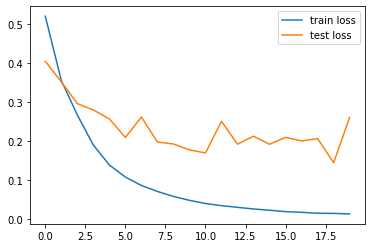

In [24]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [25]:
p_train = []
y_train = []

for inputs, targets in train_iter:
    targets = targets.view(-1, 1).float()
    
    outputs = model(inputs)

    predictions = list((outputs > 0).cpu().numpy())

    p_train += predictions
    y_train += list(targets.cpu().numpy())

p_train = np.array(p_train)
y_train = np.array(y_train)
train_acc = np.mean(y_train == p_train)

p_test = []
y_test = []

for inputs, targets in test_iter:
    targets = targets.view(-1, 1).float()

    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)

    predictions = list((outputs > 0).cpu().numpy())

    p_test += predictions
    y_test += list(targets.cpu().numpy())

p_test = np.array(p_test)
y_test = np.array(y_test)
test_acc = np.mean(y_test == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9982, Test acc: 0.9055


In [26]:
df[df['labels'] == 'spam'].size /df.size

0.13406317300789664

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1326  149]
 [   9  188]]


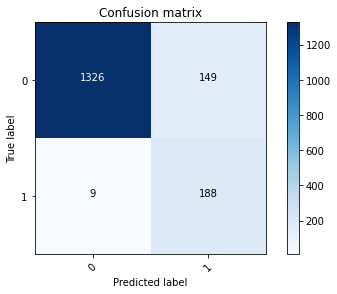

In [28]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, [0, 1])

Confusion matrix, without normalization
[[3347    3]
 [   4  546]]


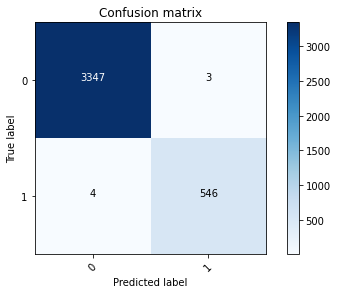

In [29]:
cm = confusion_matrix(y_train, p_train)
plot_confusion_matrix(cm, [0, 1])

In [30]:
df[df.labels == 'spam'].sample(3)

,labels,data,b_labels
1228,spam,FREE entry into our å£250 weekly comp just sen...,1
357,spam,Ur cash-balance is currently 500 pounds - to m...,1
3065,spam,Get a brand new mobile phone by being an agent...,1


In [31]:
small_sample = df[df.labels == 'spam'].sample(3)
with open('sample_test.csv', 'w') as f:
    f.write('data\n')
    for i, row in small_sample.iterrows():
        f.write(row['data'] + '\n')

In [32]:
!cat sample_test.csv

data
Do you want 750 anytime any network mins 150 text and a NEW video phone for only five pounds per week call 08000776320 now or reply for delivery Tomorrow
A link to your picture has been sent. You can also use http://alto18.co.uk/wave/wave.asp?o=44345
I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.


In [33]:
sample_dataset = ttd.TabularDataset(
    path='sample_test.csv',
    format='csv',
    fields=[('data', TEXT)],
    skip_header=True)

In [34]:
sample_iter = ttd.Iterator(
    sample_dataset,
    batch_size=32,
    sort_key=lambda x: len(x.data),
    device=device)

In [35]:
for inputs in sample_iter:
    print('inputs: ', inputs)

    outputs = model(inputs.data)

    print(outputs)

inputs:  
[torchtext.data.batch.Batch of size 3]
	[.data]:[torch.cuda.LongTensor of size 3x44 (GPU 0)]
tensor([[4.6308],
        [3.5120],
        [2.8376]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [36]:
single_sentence = 'Our dating service has been asked 2 contact U by someone shy! CALL 09058091870 NOW all will be revealed.';
TEXT.preprocess(single_sentence)

['our',
 'dating',
 'service',
 'has',
 'been',
 'asked',
 '2',
 'contact',
 'u',
 'by',
 'someone',
 'shy',
 '!',
 'call',
 '09058091870',
 'now',
 'all',
 'will',
 'be',
 'revealed',
 '.']

In [37]:
TEXT.numericalize([TEXT.preprocess(single_sentence)])

tensor([[ 105,  639,  211,  133,  142,  567,   32,  201,   11,  103,  249, 7032,
           10,   26,    0,   31,   66,   52,   50, 1726,    2]])

In [38]:
toks = TEXT.preprocess(single_sentence)
sent_idx = TEXT.numericalize([toks])
model(sent_idx.to(device))

tensor([[4.1999]], device='cuda:0', grad_fn=<AddmmBackward0>)